---
Nel bel libro di Nassim Taleb dal titolo "Statistical consequences of fat tails" tra le conseguenze della presenza di una distribuzione a code spesse è che al teorema del limite centrale occorrono troppi campioni per verificare l'ipotesi di non correlazione. Se utilizziamo la classica analisi delle componenti principali (PCA) in un EDA magari per ridurre le features potremmo andare in contro ad un errore clamoroso!

Per capire meglio il fenomeno facciamo un esempio: supponiamo di avere un una variabile con 30 features, ossia un vettore di dimensione 30. Se dobbiamo creare un modello per classificazione o regressione è naturale cercare di ridurre la dimensione del vettore con una PCA; cosa succede se le variabili sono incorrelate? Tecnicamente dovremmo avere un expected_variance_ratio uguale per ogni componente. 

Supponiamo di creare 2 dataset con le componententi incorrelate, uno di 100 osservazioni ed uno con 10000 osservazioni ed eseguiamo una PCA: 

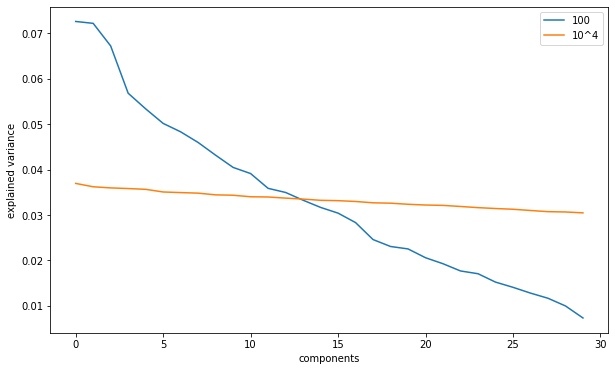

In [ ]:
from scipy.stats import levy_stable, norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
% matplotlib inline

#creaiamo 2 campioni con le le componenti i.i.d. da una distribuzione normale
norm_r10e2 = [norm.rvs(size=30) for x in range(100)]
norm_r10e4 = [norm.rvs(size=30) for x in range(10000)]

#Eseguiamo la PCA
pca = PCA(n_components=30)
pca.fit(norm_r10e2)
small_sample = pca.explained_variance_ratio_
pca.fit(norm_r10e4)
large_sample = pca.explained_variance_ratio_

#Plottiamo
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(small_sample)
plt.plot(large_sample)
plt.gca().legend(('100','10^4'))
plt.xlabel('components')
plt.ylabel('explained variance')
plt.show()

Il campione con solo 100 osservazioni ci far pensare ad una qualche correlazione tra le componenti per cui ci verrebbe da escludere quelle che spiegano meno varianza. Tuttavia aumentando il campione (da 100 a 10000 osservazioni) è possibile "lavare via" la correlazione fittizia e la PCA ci mostra i dati per quello che sono: incorrelati (linea rossa). 

Vediamo cosa succede con una distribuzione Fat-tailed:

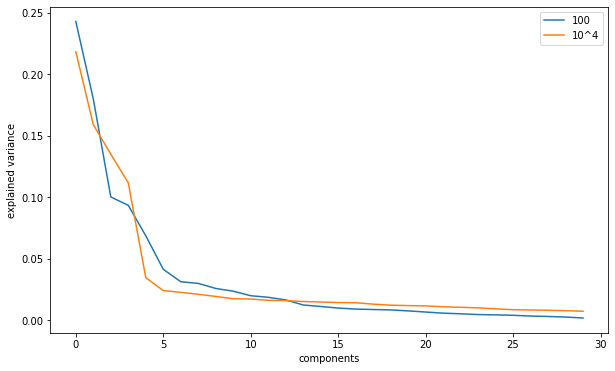

In [ ]:
#creaiamo 2 campioni con le le componenti i.i.d. da una distribuzione stabile 
alpha = 1.5
beta = 1
stable_r10e2 = [levy_stable.rvs(alpha, beta, size=30) for x in range(100)]
stable_r10e4 = [levy_stable.rvs(alpha, beta, size=30) for x in range(10000)]

#Eseguiamo la PCA
pca = PCA(n_components=30)
pca.fit(stable_r10e2)
small_sample = pca.explained_variance_ratio_
pca.fit(stable_r10e4)
large_sample = pca.explained_variance_ratio_

#Plottiamo
plt.plot(small_sample)
plt.plot(large_sample)
plt.gca().legend(('100','10^4'))
plt.xlabel('components')
plt.ylabel('explained variance')
plt.show()



Cosa è successo? E' successo che nonostante l'aumento della dimensione campionaria, il fatto di utilizzare una distribuzione a code spesse non ha permesso di "lavare via" la pseudo-correlazione dalla PCA.
In un caso pratico, in cui non conosciamo la distribuzione dei dati, l'analisi della PCA ci potrebbe portare a costruire un modello che non funziona.